In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv("D:/Personal/loan_data/train.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [7]:
# train_df['Loan_Status']=train_df['Loan_Status'].replace('Y','1')

In [8]:
# train_df['Loan_Status']=train_df['Loan_Status'].replace('N','0')

In [9]:
# train_df['Loan_Status']=train_df['Loan_Status'].astype(int)

In [10]:
new_train=train_df.copy()

In [11]:
new_train.shape

(614, 13)

# Univariate Analysis

<AxesSubplot:>

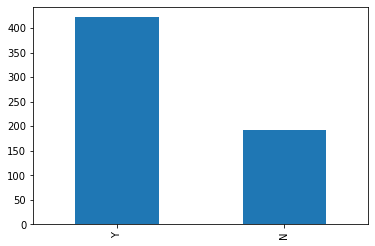

In [12]:
#Target Variable
new_train['Loan_Status'].value_counts().plot.bar()

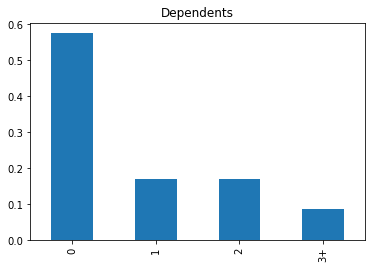

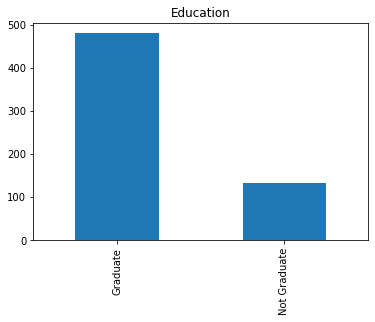

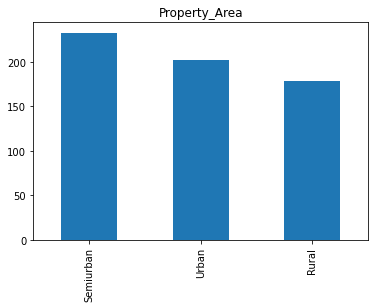

In [13]:
#Independent Ordinal Variables
# plt.figure(1)
new_train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
new_train['Education'].value_counts().plot.bar(title='Education')
plt.show()
new_train['Property_Area'].value_counts().plot.bar(title='Property_Area')
plt.show()

C:\Users\shiv.sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


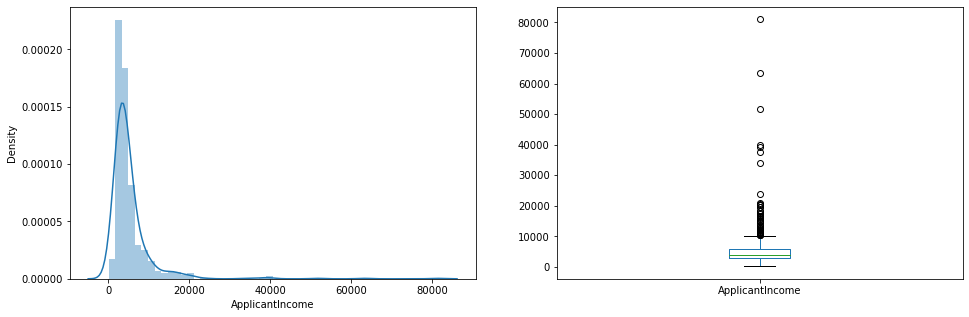

In [14]:
#Independent Numerical Variables
plt.figure(1)
plt.subplot(121)
sns.distplot(new_train['ApplicantIncome'])
plt.subplot(122)
new_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:ylabel='ApplicantIncome'>

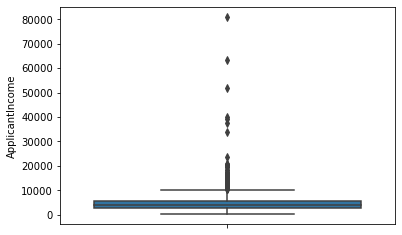

In [15]:
sns.boxplot(y=new_train['ApplicantIncome'])

C:\Users\shiv.sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


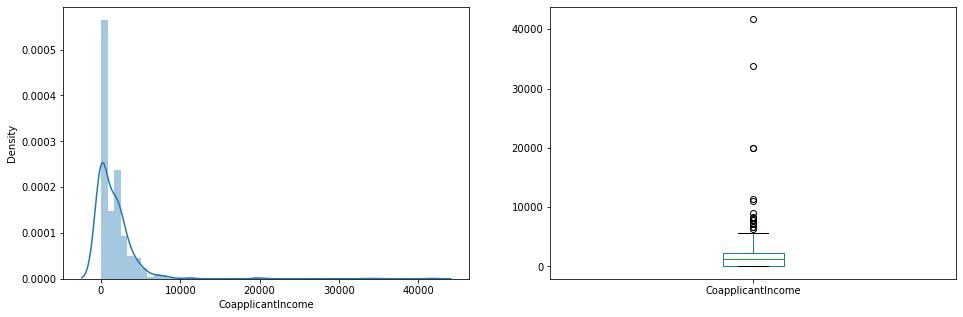

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(new_train['CoapplicantIncome'])
plt.subplot(122)
new_train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\shiv.sharma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


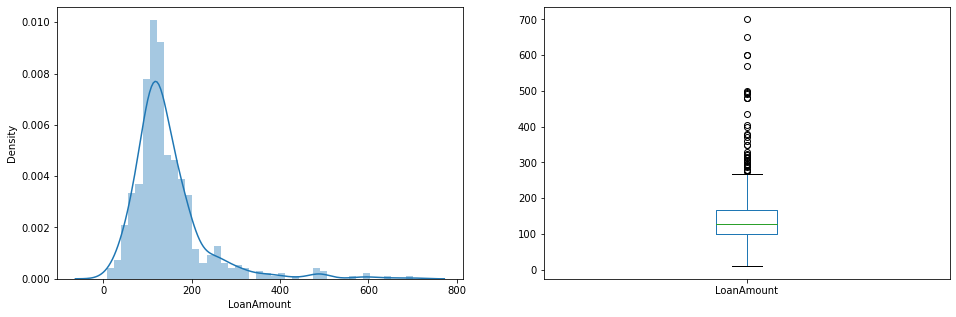

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(new_train['LoanAmount'])
plt.subplot(122)
new_train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

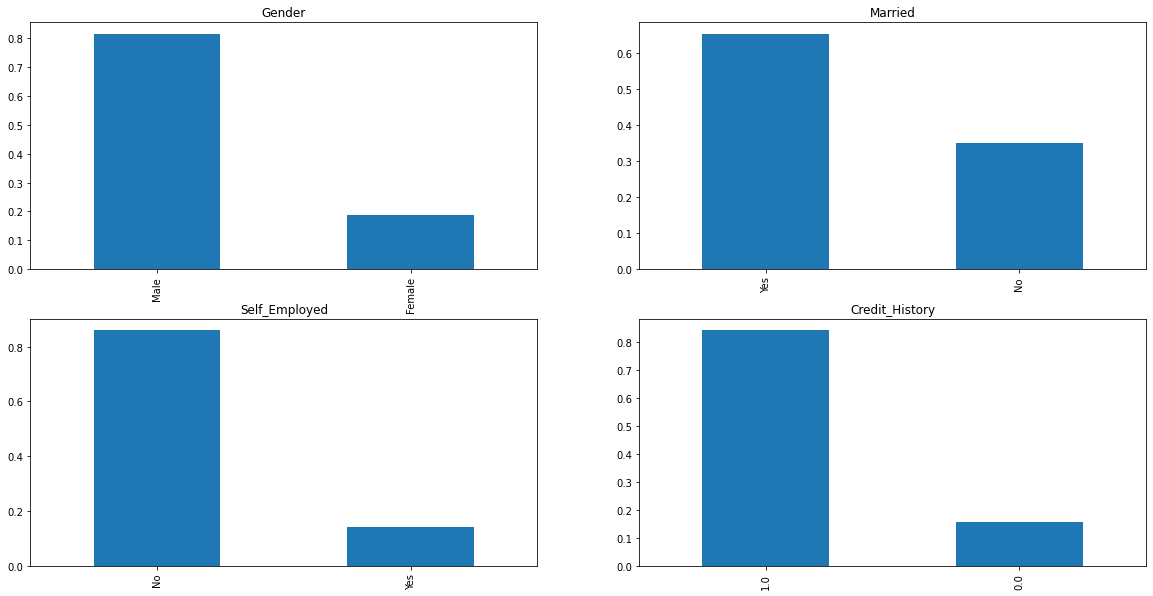

In [18]:
# Independent Categorical variables

plt.figure(1)
plt.subplot(221)
new_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
new_train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
new_train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
new_train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

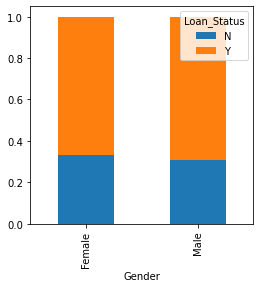

In [19]:
# Check hypothesis
# Chetogorical independent variable vs target variables

Gender=pd.crosstab(new_train['Gender'],new_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Married'>

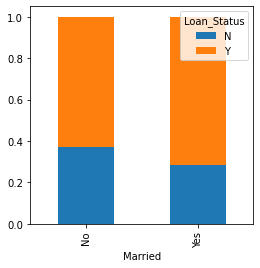

In [20]:
Married=pd.crosstab(new_train['Married'],new_train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Dependents'>

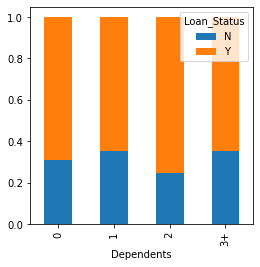

In [21]:
Dependents=pd.crosstab(new_train['Dependents'],new_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Education'>

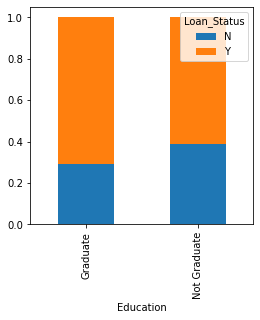

In [22]:
Education=pd.crosstab(new_train['Education'],new_train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Self_Employed'>

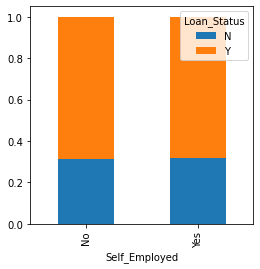

In [23]:
Self_Employed=pd.crosstab(new_train['Self_Employed'],new_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Credit_History'>

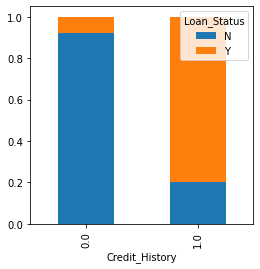

In [24]:
Credit_History=pd.crosstab(new_train['Credit_History'],new_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

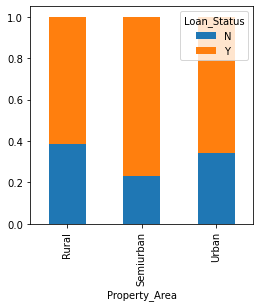

In [25]:
Property_Area=pd.crosstab(new_train['Property_Area'],new_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

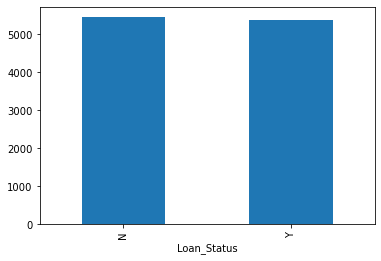

In [26]:
# Numerical independent variable vs target variable

new_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

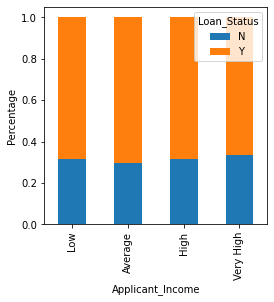

In [27]:
# Applicant Income divide into bins

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
new_train['Income_bin']=pd.cut(new_train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(new_train['Income_bin'],new_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicant_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

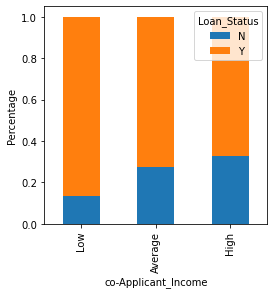

In [28]:
# Co-Applicant Income divide into bins

bins=[0,1000,3000,42000]
group=['Low','Average','High']
new_train['coapplicant_Income_bin']=pd.cut(new_train['CoapplicantIncome'],bins,labels=group)

coapplicant_Income_bin=pd.crosstab(new_train['coapplicant_Income_bin'],new_train['Loan_Status'])
coapplicant_Income_bin.div(coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('co-Applicant_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

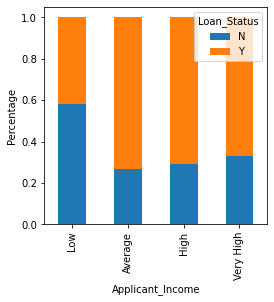

In [29]:
# Applicant Income divide into bins

new_train['Total_income']=new_train['ApplicantIncome']+new_train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
new_train['Total_Income_bin']=pd.cut(new_train['Total_income'],bins,labels=group)

Total_Income_bin=pd.crosstab(new_train['Total_Income_bin'],new_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicant_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

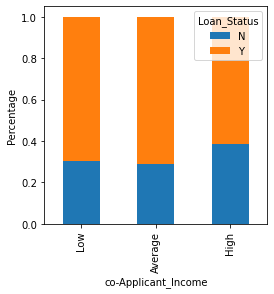

In [30]:
# Loan Amount
bins=[0,100,200,700]
group=['Low','Average','High']
new_train['LoanAmount_bin']=pd.cut(new_train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(new_train['LoanAmount_bin'],new_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('co-Applicant_Income')
plt.ylabel('Percentage')

In [31]:
new_train=new_train.drop(['Income_bin','coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_income'],axis=1)

In [32]:
new_train.shape

(614, 13)

In [33]:
new_train['Dependents'].replace('3+',3,inplace=True)
new_train['Loan_Status'].replace('N',0,inplace=True)
new_train['Loan_Status'].replace('Y',1,inplace=True)

In [34]:
new_train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [35]:
new_train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

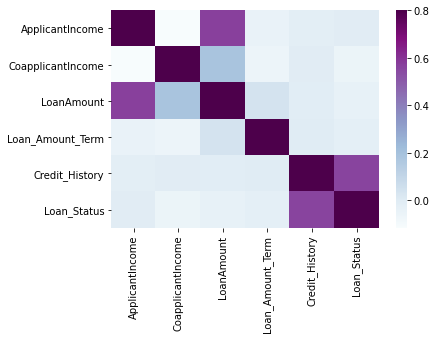

In [36]:
sns.heatmap(new_train.corr(),vmax=.8,cmap='BuPu')

In [37]:
new_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


# Imputation of missing values

In [41]:
#Fill categorical null values by mode 
new_train['Gender'].fillna(new_train['Gender'].mode()[0],inplace=True)
new_train['Married'].fillna(new_train['Married'].mode()[0],inplace=True)
new_train['Dependents'].fillna(new_train['Dependents'].mode()[0],inplace=True)
new_train['Self_Employed'].fillna(new_train['Self_Employed'].mode()[0],inplace=True)
new_train['Credit_History'].fillna(new_train['Credit_History'].mode()[0],inplace=True)

In [43]:
new_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [44]:
new_train['Loan_Amount_Term'].fillna(new_train['Loan_Amount_Term'].mode()[0],inplace=True)

In [45]:
#Because of outliers we will fill the null values by median
new_train['LoanAmount'].fillna(new_train['LoanAmount'].median(),inplace=True)

In [46]:
new_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outlier Treatment - Loan Amount

In [47]:
#using log function

new_train['LoanAmount_log']=np.log(new_train['LoanAmount'])


<AxesSubplot:>

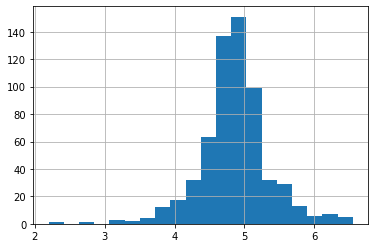

In [48]:
new_train['LoanAmount_log'].hist(bins=20)

In [49]:
new_train=new_train.drop('Loan_ID',axis=1)

In [50]:
X=new_train.drop('Loan_Status',1)
y=new_train.Loan_Status

In [53]:
#Encoding of Categorical variables
X=pd.get_dummies(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
model=LogisticRegression()

In [58]:
model.fit(X_train,y_train)

C:\Users\shiv.sharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred=model.predict(X_test)

In [60]:
pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [61]:
accuracy_score(y_test,pred)

0.827027027027027

In [82]:
test_data=pd.read_csv("D:/Personal/loan_data/test_1.csv")
test_org=pd.read_csv("D:/Personal/loan_data/test.csv")

In [68]:
test_data.shape

(367, 21)

In [69]:
pred_test=model.predict(test_data)

In [73]:
final=pd.DataFrame()

In [83]:
final['Loan_ID']=test_org['Loan_ID']

In [84]:
final['Loan_Status']=pred_test

In [85]:
final['Loan_Status'].replace(0,'N',inplace=True)
final['Loan_Status'].replace(1,'Y',inplace=True)

In [86]:
pd.DataFrame(final,columns=['Loan_ID','Loan_Status']).to_csv('D:/Personal/loan_data/final_submission.csv',index=False)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
cm=confusion_matrix(y_test, model.predict(X_test))

In [93]:
cm

array([[ 27,  27],
       [  5, 126]], dtype=int64)

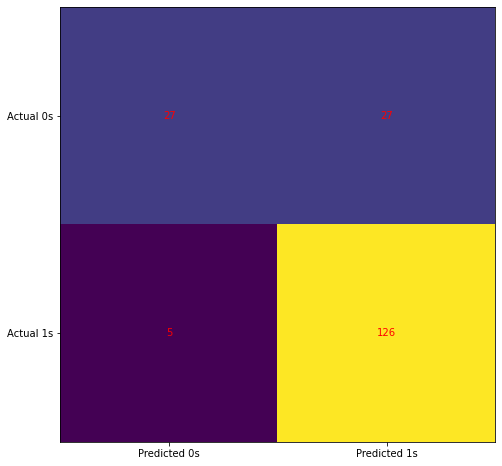

In [92]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [95]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        54
           1       0.82      0.96      0.89       131

    accuracy                           0.83       185
   macro avg       0.83      0.73      0.76       185
weighted avg       0.83      0.83      0.81       185



# AUC Curve

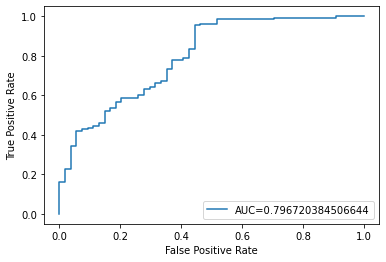

In [100]:
from sklearn import metrics
import matplotlib.pyplot as plt
# AUC Curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# ROC Curve

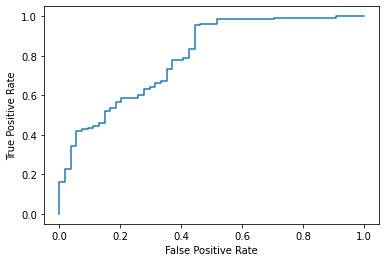

In [101]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()